In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import sys
import import_ipynb
from tensorflow import keras 

In [54]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout

In [55]:
sys.path.insert(0, r'C:\Users\Jkeus\OneDrive - Universität Münster\0Studium\Nich-Lineare-Modelierung\Noise-Research')
from NoiseGenerieren import DatenGenerieren, vsTimePloten, PredvsPrey, Data_preperation

In [56]:
Störung=1
Umdrehungen=10
ProzentderDaten=1
Prey_train, Predator_train, Prey_test, Predator_test = DatenGenerieren(Störung, Umdrehungen, ProzentderDaten)
X_train, y_train_prey, y_train_predator = Data_preperation(Prey_train, Predator_train)
X_test, y_test_prey, y_test_predator = Data_preperation(Prey_test, Predator_test)
print(X_train)

           Prey  Predator
0      0.987253  0.789803
1      1.008938  0.807473
2      1.007381  0.806550
3      1.010018  0.808984
4      1.012469  0.811270
...         ...       ...
49994  0.715939  0.348925
49995  0.700749  0.341355
49996  0.708676  0.345048
49997  0.712655  0.346816
49998  0.720576  0.350500

[49999 rows x 2 columns]


In [57]:
D = X_train.shape[1]  # how many input variables per time step
I = y_train_prey.shape[1]  # how many output variables?
print(D,I)

2 1


In [58]:
def Neural_Network(Störung, Umdrehungen, ProzentderDaten):
    Prey_train, Predator_train, Prey_test, Predator_test = DatenGenerieren(Störung, Umdrehungen, ProzentderDaten)
    X_train, y_train_prey, y_train_predator = Data_preperation(Prey_train, Predator_train)
    X_test, y_test_prey, y_test_predator = Data_preperation(Prey_test, Predator_test)
    
    y_train = pd.DataFrame()
    y_train["Prey"] = y_train_prey
    y_train["Predator"] = y_train_predator


    y_test = pd.DataFrame()
    y_test["Prey"] = y_test_prey
    y_test["Predator"] = y_test_predator
    
    D = X_train.shape[1]  # how many input variables per time step
    I = y_train.shape[1]  # how many output variables?
    print(D,I)
    
    model = keras.models.Sequential([

    # Input layer
    keras.layers.Flatten( input_shape=[ D ]),
    
    # hidden layers
    keras.layers.Dense(units =32, kernel_initializer='normal',activation='relu'),
    keras.layers.Dense(units =16, kernel_initializer='normal',activation='relu'),

    # Output layer    
    keras.layers.Dense(I)  # we want to predict one time step with I measurements
    ])

    # Fitting
    model.compile(optimizer="Adam", loss="mse")
    model.fit(X_train, y_train,
             epochs = 20, verbose = False)

    # Get error
    y_hat = model.predict(X_test)
    Error = mean_squared_error(y_hat,y_test)
    print("Error for Predator Prediction is",np.round(Error,5))

    # Plotting Results
    plt.scatter(y_hat[:,0],
           y_hat[:,1], label="Prediction")
    plt.scatter(y_test.Prey, y_test.Predator, label ="Truth")
    plt.legend()
    plt.xlabel("Prey")
    plt.ylabel("Predator")
    plt.title("NN prediction with error "+str(np.round(Error,5)))
    plt.show()
    return Error

2 2
63/63 [==============================] - 0s 2ms/step
Error for Predator Prediction is 1e-05


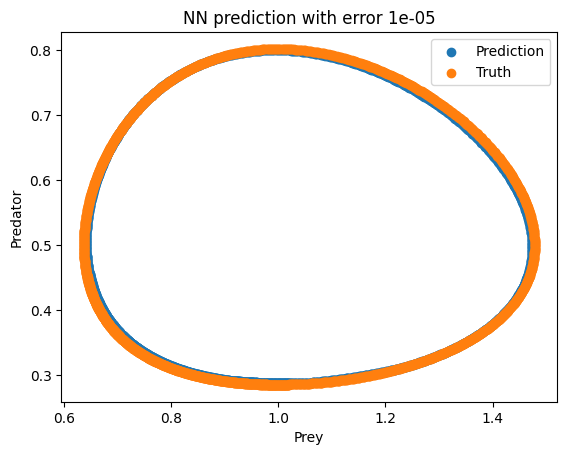

2 2
63/63 [==============================] - 0s 2ms/step
Error for Predator Prediction is 0.00018


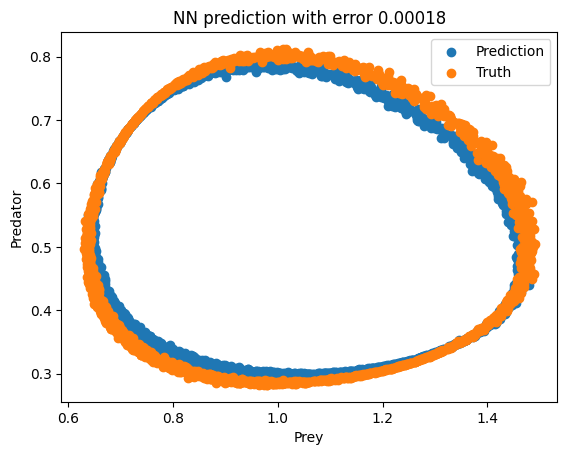

2 2
63/63 [==============================] - 0s 2ms/step
Error for Predator Prediction is 0.01751


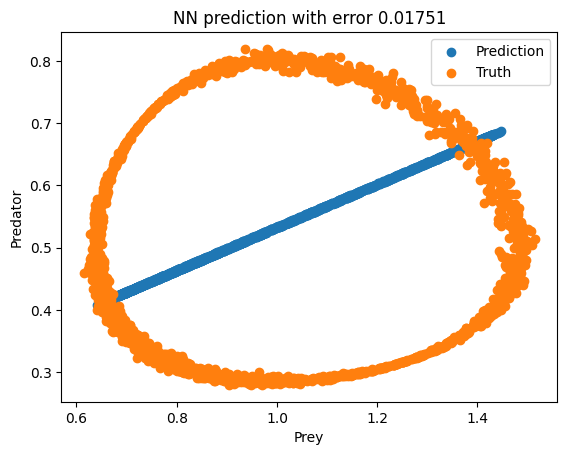

2 2
63/63 [==============================] - 0s 3ms/step
Error for Predator Prediction is 0.0005


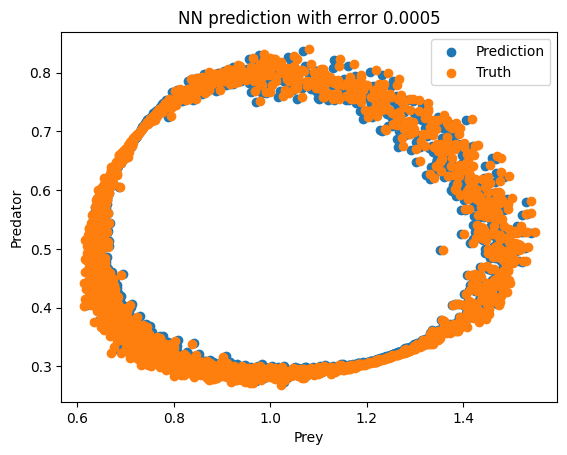

2 2
63/63 [==============================] - 0s 2ms/step
Error for Predator Prediction is 0.00313


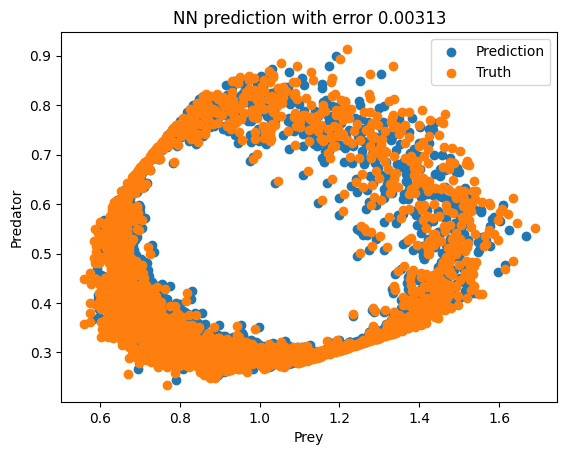

In [59]:

def apply_function_to_list(my_list):
    Error_list=[]
    for element in my_list:
       Error_list.append(Neural_Network(element,2,5))

    return Error_list

# Testen Sie die Funktionen
my_list = [0, 0.5, 1, 2, 5]
Error_list=apply_function_to_list(my_list)
